# Black-Litterman Optimization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pfgen as pfg
import datetime as dt
from dateutil.rrule import rrule, MONTHLY
from dateutil.relativedelta import relativedelta

## Testing

In [2]:
# CONSTANTS: TICKERS
NASDAQ_100 = open('nasdaq100.txt', 'r').read().split('\n')
DOW_JONES_30 = open('dj30.txt', 'r').read().split('\n')
TICKERS = ['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'AMAT', 'AMD', 'AMGN',
          'AMZN', 'ANSS', 'ASML', 'AVGO', 'AZN', 'BIIB', 'BKNG', 'BKR', 'CCEP',
          'CDNS', 'CDW', 'CHTR', 'CMCSA', 'COST', 'CPRT', 'CSCO', 'CSGP', 'CSX',
          'CTAS', 'CTSH', 'DLTR', 'DXCM', 'EA', 'EXC', 'FANG', 'FAST', 'FTNT',
          'GILD', 'GOOG', 'GOOGL', 'HON', 'IDXX', 'ILMN', 'INTC', 'INTU', 'ISRG',
          'KDP', 'KLAC', 'LRCX', 'LULU', 'MAR', 'MCHP', 'MDLZ', 'MELI', 'META',
          'MNST', 'MRVL', 'MSFT', 'MU', 'NFLX', 'NVDA', 'NXPI', 'ODFL', 'ON',
          'ORLY', 'PANW', 'PAYX', 'PCAR', 'PEP', 'QCOM', 'REGN', 'ROP', 'ROST',
          'SBUX', 'SIRI', 'SNPS', 'SPLK', 'TMUS', 'TSLA', 'TTWO', 'TXN', 'VRSK',
          'VRTX', 'WBA', 'WBD', 'WDAY', 'XEL']
TICKERS.sort()

MARKET_INDEX = '^NDX'

In [3]:
# CONSTANTS: DATE
HIST_START = '2000-01-01'
HIST_END = '2024-01-01'

TRAIN_START = '2017-01-01'
TRAIN_END = '2018-01-01'

TEST_START = '2000-01-01'
TEST_END = '2024-01-01'

In [ ]:
# CONSTANTS: DATA
ANALYST_RATINGS = pd.read_sas('analyst_ratings.sas7bdat', encoding='latin-1')
ANALYST_HIST = pd.read_sas('hist_price.sas7bdat', encoding='latin-1')

PRICE_TARGET_HIST = pd.read_sas('price_targets.sas7bdata', encoding='latin-1')

MARKET_INDEX_HIST = yf.download(MARKET_INDEX, start = HIST_START, end = HIST_END, auto_adjust=True)
MARKET_FF_HIST = pd.read_csv('ff_daily.csv')
TICKERS_HIST = yf.download(TICKERS, start = HIST_START, end = HIST_END, auto_adjust=True)

In [11]:
analyst = pfg.Analyst(ANALYST_RATINGS, ANALYST_HIST)
portfolio_t = pfg.Portfolio(TICKERS_HIST, TRAIN_START, TRAIN_END)

In [16]:
dates = []
for d in rrule(MONTHLY, dtstart=pd.to_datetime(TRAIN_START).date(), until=pd.to_datetime(TRAIN_END).date()):
  dates.append([(d - relativedelta(months=1)).strftime("%Y-%m-%d"), (d.strftime("%Y-%m-%d")), ((d + relativedelta(months=1)).strftime("%Y-%m-%d"))])

In [ ]:
pt = pd.read_sas('price_targets.sas7bdat', encoding='latin-1')

In [65]:
analyst_conf = analyst.rank("2018-01-01")

In [66]:
pt_masked = pt[['OFTIC', 'ANNDATS', 'AMASKCD', 'CURR', 'ESTCUR', 'HORIZON', 'VALUE']]
pt_masked = pt_masked[(pt_masked['CURR'] == 'USD') & (pt_masked['ESTCUR'] == 'USD')]
pt_masked['HORIZON'] = pt_masked['HORIZON'].astype(int)
pt_masked = pt_masked[(pt_masked['HORIZON'] >= 1) & (pt_masked['HORIZON'] <= 12)]
pt_masked = pt_masked[['OFTIC', 'ANNDATS', 'AMASKCD', 'HORIZON', 'VALUE']]
pt_masked.columns = ['OFTIC', 'DATE', 'AMASKCD', 'HORIZON', 'VALUE']

pt_merged = pd.merge(pt_masked, analyst_conf, on=['AMASKCD'], how='left')
pt_merged['CONFIDENCE'] = pt_merged['CONFIDENCE'].fillna(0.5)
pt_merged = pt_merged[pt_merged['OFTIC'].isin(train_data)]
pt_filtered = pt_merged[(pt_merged['DATE']>"2017-12-01") & (pt_merged['DATE']<="2018-01-01")]
pt_filtered

,OFTIC,DATE,AMASKCD,HORIZON,VALUE,CONFIDENCE
80538,AAPL,2017-12-18,49552.0,12,49.75,0.486486
80539,AAPL,2017-12-19,82561.0,12,43.75,0.572816
93370,ADSK,2017-12-21,187309.0,12,135.00,0.500000
106363,ADBE,2017-12-08,47331.0,12,179.00,0.533981
106364,ADBE,2017-12-10,72454.0,12,175.00,0.457143
...,...,...,...,...,...,...
1926662,WBA,2017-12-03,58637.0,12,78.00,0.458333
1926663,WBA,2017-12-20,78782.0,12,80.00,0.606383
1926664,WBA,2017-12-22,105955.0,12,81.00,0.466667
2009461,AZN,2017-12-05,91971.0,12,38.46,0.875000


In [69]:
last_day = pd.DataFrame(portfolio_t.data['Close'].iloc[-1]).reset_index()
last_day.columns = ['OFTIC', 'CLOSE']
last_day

,OFTIC,CLOSE
0,AAPL,39.955589
1,ADBE,175.240005
2,ADI,79.357170
3,ADP,103.370186
4,ADSK,104.830002
...,...,...
81,VRTX,149.860001
82,WBA,55.914219
83,WBD,22.379999
84,WDAY,101.739998


In [109]:
pt_pct = pd.merge(pt_filtered, last_day, on='OFTIC')
pt_pct['RET'] = (pt_pct['VALUE'] - pt_pct['CLOSE']) / pt_pct['CLOSE'] / (pt_pct['HORIZON'] * 21)
pt_pct['CONFIDENCE'] = pt_pct['CONFIDENCE'] * 0.1
pt_pct

,OFTIC,DATE,AMASKCD,HORIZON,VALUE,CONFIDENCE,CLOSE,RET
0,AAPL,2017-12-18,49552.0,12,49.75,0.048649,39.955589,0.000973
1,AAPL,2017-12-19,82561.0,12,43.75,0.057282,39.955589,0.000377
2,ADSK,2017-12-21,187309.0,12,135.00,0.050000,104.830002,0.001142
3,ADBE,2017-12-08,47331.0,12,179.00,0.053398,175.240005,0.000085
4,ADBE,2017-12-10,72454.0,12,175.00,0.045714,175.240005,-0.000005
...,...,...,...,...,...,...,...,...
333,WBA,2017-12-03,58637.0,12,78.00,0.045833,55.914219,0.001567
334,WBA,2017-12-20,78782.0,12,80.00,0.060638,55.914219,0.001709
335,WBA,2017-12-22,105955.0,12,81.00,0.046667,55.914219,0.001780
336,AZN,2017-12-05,91971.0,12,38.46,0.087500,28.770945,0.001336


In [110]:
from pypfopt import black_litterman

In [111]:
bl_P = pd.DataFrame(0, index=pt_pct.index, columns=train_data)
for idx, val in pt_pct['OFTIC'].items():
  bl_P.loc[idx, val] = 1
bl_P

,AAPL,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,AMZN,...,TMUS,TSLA,TTWO,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
bl = black_litterman.BlackLittermanModel(portfolio_t.cov_matrix, pi=np.array(portfolio_t.expected_returns), Q=pt_pct['RET'], P=bl_P, view_confidences=pt_pct['CONFIDENCE'], omega='idzorek')
t_w = bl.bl_returns()
bl.bl_weights().values()

odict_values([0.00504386495879799, -0.034805427063334046, -0.014159029047920138, 0.05867538082773107, -0.013069105284829826, 0.04030157890006839, -0.01574258269472357, -0.01200939641412852, 0.023936217555540422, -0.014962590332335306, 0.06438536987356068, 0.04070987236802587, -0.005610150763662668, 0.021313968661124172, 0.002752549459801597, -0.07999370590600552, -0.04374299802697235, 0.0682757496211431, 0.04552380869373884, 0.014287709091349798, -0.02175256252192491, -0.0036724348302301763, 0.013892444922081325, 0.03079515634421558, 0.019349563137998328, 0.029030389107299263, 0.025545320782087582, 0.009558932397032979, 0.02259219964877683, 0.043776646254703185, -0.012921679388552878, -0.019092646519321483, 0.07475156330016677, 0.057189345579783314, -3.0885844493640524e-05, 0.028847378120144797, -0.028267817639251663, -0.029722373466586002, -0.037587459342316075, 0.04534183125518586, -0.0029102206103255963, 0.02924171531104453, -0.009098624738094816, 0.00825679614656377, 0.091464504400

In [113]:
portfolio_t.expected_returns

[0.0015992325328046274,
 0.002169090750095129,
 0.0009574252300222036,
 0.0006269243274014654,
 0.0014276639340251212,
 0.0007651609280964346,
 0.002025701971448543,
 0.00023427343636755836,
 0.0007103600936112952,
 0.0018110419157772242,
 0.0018769631815409578,
 0.001915651744695075,
 0.0016205062145618443,
 0.001184162383947868,
 0.00042567839496647546,
 0.0007120419749048516,
 -0.0012607953790840052,
 0.0010718664950878326,
 0.0020520640143384446,
 0.0012816074548449789,
 0.0007343045880820569,
 0.00068633044054256,
 0.0008565729734132251,
 0.0017974221592835953,
 0.0010633243676039898,
 0.0019062189294120847,
 0.0019487776216414387,
 0.00124156693937111,
 0.000957982690555332,
 0.001368336115816703,
 0.0005132796165235485,
 0.0012128608244303656,
 0.000602551622271288,
 0.0009460871704337015,
 0.0007939690354981044,
 0.0015787951873839565,
 3.0248485839973557e-05,
 0.0011588477319514423,
 0.0010745451393111762,
 0.0011805164770392034,
 0.0012256788883837982,
 0.0021881007630775154,

In [52]:
weights = []
for date in dates:
  train_start, train_end, _ = date
  market_train = MarketFF(train_start, train_end)
  portfolio_train = Portfolio(train_data, train_start, train_end, data)
  mvo_train = MVO(portfolio_train, market_train, [[0,1]] * len(train_data))
  mvo_train.maximum_sharpe()
  weights.append(mvo_train.stats['Weights'])

In [98]:
market_test = MarketIndex('^NDX', dates[0][1], dates[-1][1])

[*********************100%%**********************]  1 of 1 completed


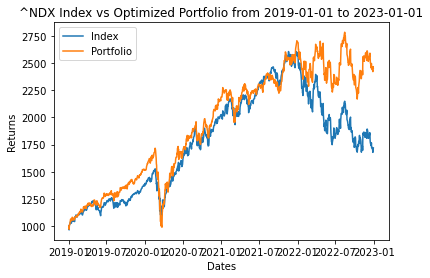

In [114]:
data_ret = data['Close'].pct_change()[1:]
market_trace = [1000]
for ret in market_test.data['Return'][1:]:
  market_trace.append(market_trace[-1] * (1+ret))

pf_trace_total = []
amt = 1000
for i in range(len(dates) - 1):
  _, start, end = dates[i]
  weight = bl.bl_weights().values()
  pf_trace = data_ret.copy()
  pf_trace = pf_trace[(pf_trace.index >= start) & (pf_trace.index < end)]
  pf_ret = pf_trace.copy()
  pf_trace.iloc[0] = weight
  pf_trace.iloc[0] *= amt

  for idx in pf_trace.index[1:]:
    pf_trace.loc[idx] = pf_trace.shift(1).loc[idx] * (1+pf_trace.loc[idx])
  
  amt = pf_trace.sum(axis=1)[-1]
  pf_trace_total.append(pf_trace.sum(axis=1))
pf_trace_total = pd.concat(pf_trace_total)

plt.plot(np.array(market_test.data.index), market_trace, label="Index")
plt.plot(pd.array(pf_trace_total.index), pf_trace_total.values, label="Portfolio")
plt.title(f'{market_test.ticker} Index vs Optimized Portfolio from {dates[0][1]} to {dates[-1][1]}')
plt.legend(loc='best')
plt.xlabel('Dates')
plt.ylabel('Returns')
plt.show()